# Health Promotion Administration
# & CGRD
# & 1.DM, 2.hypertension, 3.hyperlipidemia

In [1]:
import numpy as np
from utils import *

In [2]:
warnings.filterwarnings("ignore")  
os.getcwd()

'C:\\Users\\user\\Desktop\\for github'

# Read csv- CGRD

In [3]:
cgrd_2017 = pd.read_csv('data\\cgrd_2017.csv')
cgrd_2018 = pd.read_csv('data\\cgrd_2018.csv')
cgrd_2019 = pd.read_csv('data\\cgrd_2019.csv')

cgrd_2017.info()
cgrd_2018.info()
cgrd_2019.info()

cgrd_2017['year'] = 2017
cgrd_2018['year'] = 2018
cgrd_2019['year'] = 2019

cgrd_2017.tail(2)
cgrd_2018.tail(2)
cgrd_2019.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268005 entries, 0 to 268004
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(20), int64(66), object(28)
memory usage: 233.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271895 entries, 0 to 271894
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(20), int64(66), object(28)
memory usage: 236.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274233 entries, 0 to 274232
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(17), int64(66), object(31)
memory usage: 238.5+ MB


,idcode,breast,data_date,hosp,BC_n,bc_gp,FOBT,OC,birth_year,age,...,Colonscopy_past_date,Colorectal_cancer,CLNCDXDAT,CLNCDXDAT1,CAUSE,ICD,D_DATE,CAUSE_CNM,ICD_CODE,year
274231,FFFF83BC5D8EBA54B38CD37DDD2A6B1AC8311471,NaN,201912,1132070011,N,NaN,NaN,2017-08-08,1964,55,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
274232,FFFFAFA8D6A70AF762326FF3E6EBF5C5AEC56324,NaN,201909,1101010012,0,6.0,2017-03-02,NaN,1962,57,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [4]:
## concat 3 years
cgrd_3y = pd.concat([cgrd_2017, cgrd_2018, cgrd_2019]).reset_index(drop=True)
cgrd_3y.tail(2)

,idcode,breast,data_date,hosp,BC_n,bc_gp,FOBT,OC,birth_year,age,...,Colonscopy_past_date,Colorectal_cancer,CLNCDXDAT,CLNCDXDAT1,CAUSE,ICD,D_DATE,CAUSE_CNM,ICD_CODE,year
814131,FFFF83BC5D8EBA54B38CD37DDD2A6B1AC8311471,NaN,201912,1132070011,N,NaN,NaN,2017-08-08,1964,55,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
814132,FFFFAFA8D6A70AF762326FF3E6EBF5C5AEC56324,NaN,201909,1101010012,0,6.0,2017-03-02,NaN,1962,57,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


# Select columns

In [5]:
df_3y = pd.DataFrame()
df_3y['hosp'] = (cgrd_3y.hosp).map({1101010012:'Taipei', 1132070011:'Linkou'})
df_3y['bc_gp'] = (cgrd_3y.bc_gp)
df_3y['age_gp'] = (cgrd_3y.age_gp)
df_3y['oc_gp'] = (cgrd_3y.oc_gp)
df_3y['pas_gp'] = (cgrd_3y.pas_gp)
df_3y['sex'] = (cgrd_3y.sex)
df_3y['COUNTY_'] = (cgrd_3y.COUNTY_)
df_3y['hosp_shopping_logistic'] = (cgrd_3y.hosp_shopping_logistic)
# df_3y['CCI_MI'] = (cgrd_3y.CCI_MI)
# df_3y['CCI_CHF'] = (cgrd_3y.CCI_CHF)

# df_3y['CCI_PVD'] = (cgrd_3y.CCI_PVD)
# df_3y['CCI_CVD'] = (cgrd_3y.CCI_CVD)
# df_3y['CCI_Dementia'] = (cgrd_3y.CCI_Dementia)
# df_3y['CCI_COPD'] = (cgrd_3y.CCI_COPD)
# df_3y['CCI_Rheumatic'] = (cgrd_3y.CCI_Rheumatic)
# df_3y['CCI_Ulcer'] = (cgrd_3y.CCI_Ulcer)
# df_3y['CCI_MLD'] = (cgrd_3y.CCI_MLD)
df_3y['CCI_DM_wo_chronic'] = (cgrd_3y.CCI_DM_wo_chronic)
df_3y['CCI_DM_w_chronic'] = (cgrd_3y.CCI_DM_w_chronic)
# df_3y['CCI_Hemiplegia'] = (cgrd_3y.CCI_Hemiplegia)

# df_3y['CCI_Renal'] = (cgrd_3y.CCI_Renal)
# df_3y['CCI_Malignancy'] = (cgrd_3y.CCI_Malignancy)
# df_3y['CCI_MSLD'] = (cgrd_3y.CCI_MSLD)
# df_3y['CCI_Cancer'] = (cgrd_3y.CCI_Cancer)
# df_3y['CCI_AIDS'] = (cgrd_3y.CCI_AIDS)
df_3y['hypertension'] = (cgrd_3y.hypertension)
df_3y['hyperlipidemia'] = (cgrd_3y.hyperlipidemia)
df_3y['Hba1c'] = (cgrd_3y.Hba1c)
df_3y['cholesterol'] = (cgrd_3y.cholesterol)
df_3y['triglyceride'] = (cgrd_3y.triglyceride)

df_3y['HDL'] = (cgrd_3y.HDL)
# df_3y['SelfPay_health_examination'] = (cgrd_3y.SelfPay_health_examination)
# df_3y['health_examination'] = (cgrd_3y.health_examination)
# df_3y['health_examination_diff'] = (cgrd_3y.health_examination_diff)
# df_3y['Colonscopy_past'] = (cgrd_3y.Colonscopy_past)
df_3y['OPD_visit'] = (cgrd_3y.OPD_visit)
df_3y['IPD_visit'] = (cgrd_3y.IPD_visit)
df_3y['year'] = (cgrd_3y.year)
df_3y['outcome_screen'] = (cgrd_3y.outcome_screen)

df_3y.tail(2)

,hosp,bc_gp,age_gp,oc_gp,pas_gp,sex,COUNTY_,hosp_shopping_logistic,CCI_DM_wo_chronic,CCI_DM_w_chronic,hypertension,hyperlipidemia,Hba1c,cholesterol,triglyceride,HDL,OPD_visit,IPD_visit,year,outcome_screen
814131,Linkou,NaN,2,1,NaN,M,1,3,0,0,0,0,NaN,NaN,NaN,NaN,2,0,2019,0
814132,Taipei,6.0,2,9,4.0,F,1,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,2019,0


In [6]:
# df_3y.hosp_shopping_logistic.value_counts()

In [7]:
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace('M', 7) ## "M"雲林
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(1.0, 1)
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(2.0, 2)
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(3.0, 3)
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(5.0, 5)
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(6.0, 6)
df_3y['hosp_shopping_logistic'] = df_3y.hosp_shopping_logistic.replace(8.0, 8)

df_3y.hosp_shopping_logistic.value_counts()

3    375282
1    162043
5     42125
2      4289
3      3847
6      2226
1      1578
8      1507
7       550
5       447
2        46
6        24
8        19
Name: hosp_shopping_logistic, dtype: int64

# Split on sex

In [8]:
# ## male
# df_3y_M = df_3y[df_3y.sex == 'M'].reset_index(drop=True)
# del df_3y_M['sex']
# del df_3y_M['bc_gp']
# del df_3y_M['pas_gp']

# df_3y_M.info()

In [9]:
## female in Taipei has HHH
df_3y_F_T_HHH = df_3y[(df_3y.sex == 'F') & (df_3y.hosp == 'Taipei') & 
                      (df_3y.CCI_DM_wo_chronic == 1) & (df_3y.CCI_DM_w_chronic == 1) & 
                      (df_3y.hypertension == 1) & (df_3y.hyperlipidemia == 1)].reset_index(drop=True)

del df_3y_F_T_HHH['sex']
del df_3y_F_T_HHH['hosp']
del df_3y_F_T_HHH['CCI_DM_wo_chronic']
del df_3y_F_T_HHH['CCI_DM_w_chronic']
del df_3y_F_T_HHH['hypertension']
del df_3y_F_T_HHH['hyperlipidemia']

df_3y_F_T_HHH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bc_gp                   404 non-null    float64
 1   age_gp                  404 non-null    int64  
 2   oc_gp                   404 non-null    int64  
 3   pas_gp                  404 non-null    float64
 4   COUNTY_                 404 non-null    int64  
 5   hosp_shopping_logistic  404 non-null    object 
 6   Hba1c                   387 non-null    float64
 7   cholesterol             252 non-null    float64
 8   triglyceride            270 non-null    float64
 9   HDL                     219 non-null    float64
 10  OPD_visit               404 non-null    int64  
 11  IPD_visit               404 non-null    int64  
 12  year                    404 non-null    int64  
 13  outcome_screen          404 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory 

In [10]:
## dropna
df_3y_F_T_HHH = df_3y_F_T_HHH.dropna().reset_index(drop=True)
df_3y_F_T_HHH['hosp_shopping_logistic'] = df_3y_F_T_HHH.hosp_shopping_logistic.astype(int)
df_3y_F_T_HHH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bc_gp                   219 non-null    float64
 1   age_gp                  219 non-null    int64  
 2   oc_gp                   219 non-null    int64  
 3   pas_gp                  219 non-null    float64
 4   COUNTY_                 219 non-null    int64  
 5   hosp_shopping_logistic  219 non-null    int32  
 6   Hba1c                   219 non-null    float64
 7   cholesterol             219 non-null    float64
 8   triglyceride            219 non-null    float64
 9   HDL                     219 non-null    float64
 10  OPD_visit               219 non-null    int64  
 11  IPD_visit               219 non-null    int64  
 12  year                    219 non-null    int64  
 13  outcome_screen          219 non-null    int64  
dtypes: float64(6), int32(1), int64(7)
memory u

In [11]:
# df_3y_F_T_HHH.outcome_screen.value_counts().plot(kind='bar', title='HHH outcome_screen of 3 years')


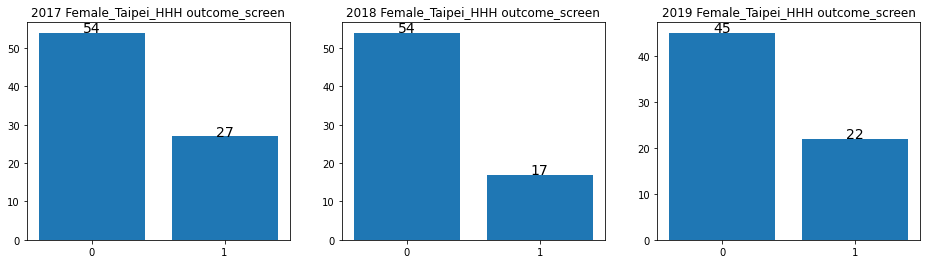

In [12]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(131)
ax1.bar(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].outcome_screen.unique()), 
        df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].outcome_screen.value_counts(), tick_label=[0 , 1])
ax1.set_title('2017 Female_Taipei_HHH outcome_screen')
for x,y in zip(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].outcome_screen.unique()), df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].outcome_screen.value_counts()):
    ax1.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')
    
ax2 = fig.add_subplot(132)
ax2.bar(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].outcome_screen.unique()), 
        df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].outcome_screen.value_counts(), tick_label=[0 , 1])
ax2.set_title('2018 Female_Taipei_HHH outcome_screen')
for x,y in zip(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].outcome_screen.unique()), df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].outcome_screen.value_counts()):
    ax2.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')

ax3 = fig.add_subplot(133)
ax3.bar(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].outcome_screen.unique()), 
        df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].outcome_screen.value_counts(), tick_label=[0 , 1])
ax3.set_title('2019 Female_Taipei_HHH outcome_screen')
for x,y in zip(sorted(df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].outcome_screen.unique()), df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].outcome_screen.value_counts()):
    ax3.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')

plt.show()

# Correlation

In [13]:
## category
df_3y_F_T_HHHy_catg = df_3y_F_T_HHH.iloc[:, :-4]
df_3y_F_T_HHHy_catg['outcome_screen'] = df_3y_F_T_HHH.outcome_screen

df_3y_F_T_HHHy_catg.corr(method='spearman')

,bc_gp,age_gp,oc_gp,pas_gp,COUNTY_,hosp_shopping_logistic,Hba1c,cholesterol,triglyceride,HDL,outcome_screen
bc_gp,1.000000,0.589255,0.241663,0.202330,0.008308,0.140722,0.120910,-0.124101,-0.042320,-0.010831,-0.059957
age_gp,0.589255,1.000000,0.083826,-0.012890,-0.063659,0.165052,0.050827,-0.010184,0.068182,0.154661,0.069165
oc_gp,0.241663,0.083826,1.000000,0.212550,-0.018311,0.040783,0.021665,-0.096936,-0.059513,0.006636,-0.060883
pas_gp,0.202330,-0.012890,0.212550,1.000000,0.010274,-0.058577,-0.097792,-0.074719,-0.028461,0.043408,-0.382583
COUNTY_,0.008308,-0.063659,-0.018311,0.010274,1.000000,-0.299232,0.008104,0.066022,-0.038144,0.125902,-0.029166
hosp_shopping_logistic,0.140722,0.165052,0.040783,-0.058577,-0.299232,1.000000,0.133725,-0.068409,-0.003046,0.028155,0.113963
Hba1c,0.120910,0.050827,0.021665,-0.097792,0.008104,0.133725,1.000000,-0.015084,0.048055,0.070908,-0.107237
cholesterol,-0.124101,-0.010184,-0.096936,-0.074719,0.066022,-0.068409,-0.015084,1.000000,0.201360,0.036775,0.000653
triglyceride,-0.042320,0.068182,-0.059513,-0.028461,-0.038144,-0.003046,0.048055,0.201360,1.000000,0.248099,0.035259
HDL,-0.010831,0.154661,0.006636,0.043408,0.125902,0.028155,0.070908,0.036775,0.248099,1.000000,0.001091


In [14]:
## numeric 
df_3y_F_T_HHHy_num = df_3y_F_T_HHH.iloc[:, -4:-2]
df_3y_F_T_HHHy_num['outcome_screen'] = df_3y_F_T_HHH.outcome_screen
df_3y_F_T_HHHy_num.corr()

,OPD_visit,IPD_visit,outcome_screen
OPD_visit,1.000000,0.211530,0.075072
IPD_visit,0.211530,1.000000,0.080393
outcome_screen,0.075072,0.080393,1.000000


# Split to training/ valid/ test

In [15]:
X_train = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].iloc[:, :-4]
y_train = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2017].outcome_screen

X_valid = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].iloc[:, :-4]
y_valid = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2018].outcome_screen

X_test = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].iloc[:, :-4]
y_test = df_3y_F_T_HHH[df_3y_F_T_HHH.year == 2019].outcome_screen

# Model_XGBoost Classifier

In [16]:
start_time = time.time()

xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(xgboost.__version__)
print(cv)
print('XGBClassifier:', cv.mean())
print("--- %s seconds ---" % (time.time() - start_time))


[15:55:55] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:55] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:55] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:55] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

# Training

[15:55:55] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


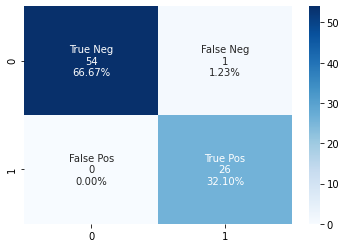

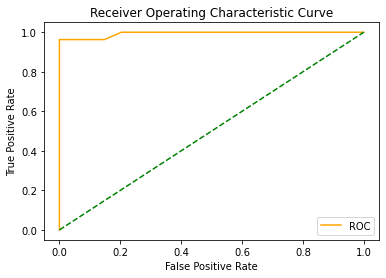

--------------- True/False Pos/Neg ---------------
              True Neg False Pos False Neg True Pos    AUC
F_T_HHH_train       54         0         1       26  0.981 

[15:55:56] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
train = confusio_matrix(xgb, X_train, y_train)
plot_roc_curve(xgb, X_train, y_train)

train = train.rename(index={0: "F_T_HHH_train"})
print('--------------- True/False Pos/Neg ---------------')
print(train, '\n')

train_imp = get_impotances(xgb, X_train, y_train)
train_imp.columns = ['F_T_HHH_column', 'F_T_HHH_train_impor']

# train_imp

# Validation

[15:55:56] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


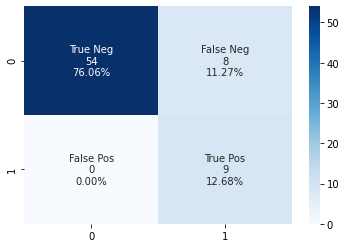

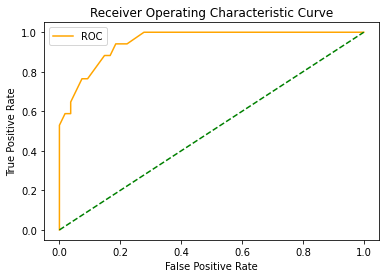

--------------- True/False Pos/Neg ---------------
              True Neg False Pos False Neg True Pos    AUC
F_T_HHH_valid       54         0         8        9  0.765 

[15:55:56] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
valid = confusio_matrix(xgb, X_valid, y_valid)
plot_roc_curve(xgb, X_valid, y_valid)

valid = valid.rename(index={0: "F_T_HHH_valid"})
print('--------------- True/False Pos/Neg ---------------')
print(valid, '\n')

valid_imp = get_impotances(xgb, X_valid, y_valid)
valid_imp.columns = ['F_T_HHH_column', 'F_T_HHH_valid_impor']
# valid_imp

# Test

[15:55:56] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


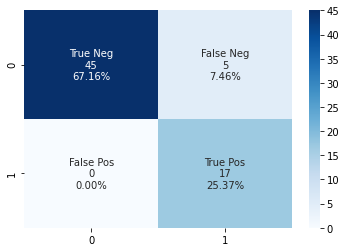

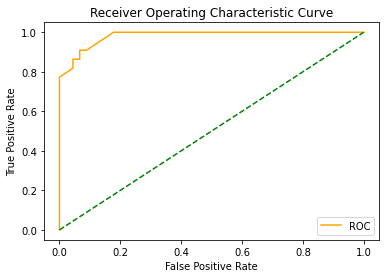

--------------- True/False Pos/Neg ---------------
             True Neg False Pos False Neg True Pos    AUC
F_T_HHH_test       45         0         5       17  0.886 

[15:55:56] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
test = confusio_matrix(xgb, X_test, y_test)
plot_roc_curve(xgb, X_test, y_test)

test = test.rename(index={0: "F_T_HHH_test"})
print('--------------- True/False Pos/Neg ---------------')
print(test, '\n')

test_imp = get_impotances(xgb, X_test, y_test)
test_imp.columns = ['F_T_HHH_column', 'F_T_HHH_test_impor']
# test_imp

# Result

In [20]:
print('--- Female_Taipei HHH result---')
result = pd.concat([train, valid, test])
result 

--- Female_Taipei HHH result---


,True Neg,False Pos,False Neg,True Pos,AUC
F_T_HHH_train,54,0,1,26,0.981
F_T_HHH_valid,54,0,8,9,0.765
F_T_HHH_test,45,0,5,17,0.886


In [21]:
result1 = train_imp.merge(valid_imp, left_on='F_T_HHH_column', right_on='F_T_HHH_column')
result1 = result1.merge(test_imp, left_on='F_T_HHH_column', right_on='F_T_HHH_column')
result1

,F_T_HHH_column,F_T_HHH_train_impor,F_T_HHH_valid_impor,F_T_HHH_test_impor
0,pas_gp,0.279929,0.159908,0.162360
1,Hba1c,0.159402,0.080305,0.069706
2,age_gp,0.124826,0.125978,0.113709
3,bc_gp,0.117036,0.128040,0.187933
4,triglyceride,0.111894,0.447546,0.296825
5,oc_gp,0.107952,0.029461,0.085644
6,HDL,0.098960,0.028761,0.083823
7,COUNTY_,0.000000,0.000000,0.000000
8,hosp_shopping_logistic,0.000000,0.000000,0.000000
9,cholesterol,0.000000,0.000000,0.000000
